<a href="https://colab.research.google.com/github/KwonHo-geun/AI_Study/blob/main/25.08.05_StarGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ffmpeg-python==0.2.0 munch==2.5.0

In [2]:
!git clone https://github.com/clovaai/stargan-v2.git

Cloning into 'stargan-v2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269 (from 1)
Receiving objects: 100% (269/269), 38.86 MiB | 34.42 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [3]:
import os
os.chdir('./stargan-v2')

In [4]:
!bash download.sh pretrained-network-afhq

##################################################
# gdown이 안 될 경우 직접 링크에 들어가 다운받아 사용해주세요 #
##################################################
!gdown https://drive.google.com/uc?id=1Jxx0ARJ3wX0tjO2_U2GuZyl3l56aV5MO

!unzip afhq_samples.zip

download.sh: line 9: 
StarGAN v2
Copyright (c) 2020-present NAVER Corp.

This work is licensed under the Creative Commons Attribution-NonCommercial
4.0 International License. To view a copy of this license, visit
http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.
: No such file or directory
for details.

--2025-08-05 12:25:10--  https://www.dropbox.com/s/etwm810v25h42sn/100000_nets_ema.ckpt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/y4z2u9eb8qqaezh7y70v7/100000_nets_ema.ckpt?rlkey=s4v9h3kun1smd3ucs3v88fet7&dl=0 [following]
--2025-08-05 12:25:10--  https://www.dropbox.com/scl/fi/y4z2u9eb8qqaezh7y70v7/100000_nets_ema.ckpt?rlkey=s4v9h3kun1smd3ucs3v88fet7&dl=0
Reusing existing connection to www.dr

In [5]:
import torch
from argparse import Namespace
from munch import Munch

from core.solver import Solver
from core.data_loader import get_test_loader

In [10]:
args = {
      'img_size':256,
      'num_domains':3,
      'latent_dim':16,
      'hidden_dim':512,
      'style_dim':64,
      'lambda_reg':1,
      'lambda_cyc':1,
      'lambda_sty':1,
      'lambda_ds':1,
      'ds_iter':100000,
      'w_hpf':0,
      'mode':'sample',
      'checkpoint_dir':'/content/stargan-v2/expr/checkpoints/afhq',    # checkpoint directory
      'src_dir':'/content/stargan-v2/afhq_samples/cat', # source dataset
      'ref_dir':'/content/stargan-v2/afhq_samples/dog', # target dataset
      'val_batch_size':6,
      'num_workers':1,
      'result_dir':'/content/stargan-v2/results', # result directory
      'resume_iter':100000,
      'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

opt = Namespace(**args)

In [11]:
solver = Solver(opt)

Number of parameters of generator: 33892995
Number of parameters of mapping_network: 3259072
Number of parameters of style_encoder: 20949760
Number of parameters of discriminator: 20852803
Initializing generator...
Initializing mapping_network...
Initializing style_encoder...
Initializing discriminator...


In [12]:
loaders = Munch(src=get_test_loader(root=opt.src_dir,
                                    img_size=opt.img_size,
                                    batch_size=opt.val_batch_size,
                                    shuffle=False,
                                    num_workers=opt.num_workers),
                ref=get_test_loader(root=opt.ref_dir,
                                    img_size=opt.img_size,
                                    batch_size=opt.val_batch_size,
                                    shuffle=False,
                                    num_workers=opt.num_workers))

Preparing DataLoader for the generation phase...
Preparing DataLoader for the generation phase...


Loading checkpoint from /content/stargan-v2/expr/checkpoints/afhq/100000_nets_ema.ckpt...
Working on /content/stargan-v2/results/reference.jpg...
Working on /content/stargan-v2/results/video_ref.mp4...


video_ref: 100%|██████████| 6/6 [00:26<00:00,  4.39s/it]
writing video to /content/stargan-v2/results/video_ref.mp4: 100%|██████████| 165/165 [00:13<00:00, 12.16it/s]


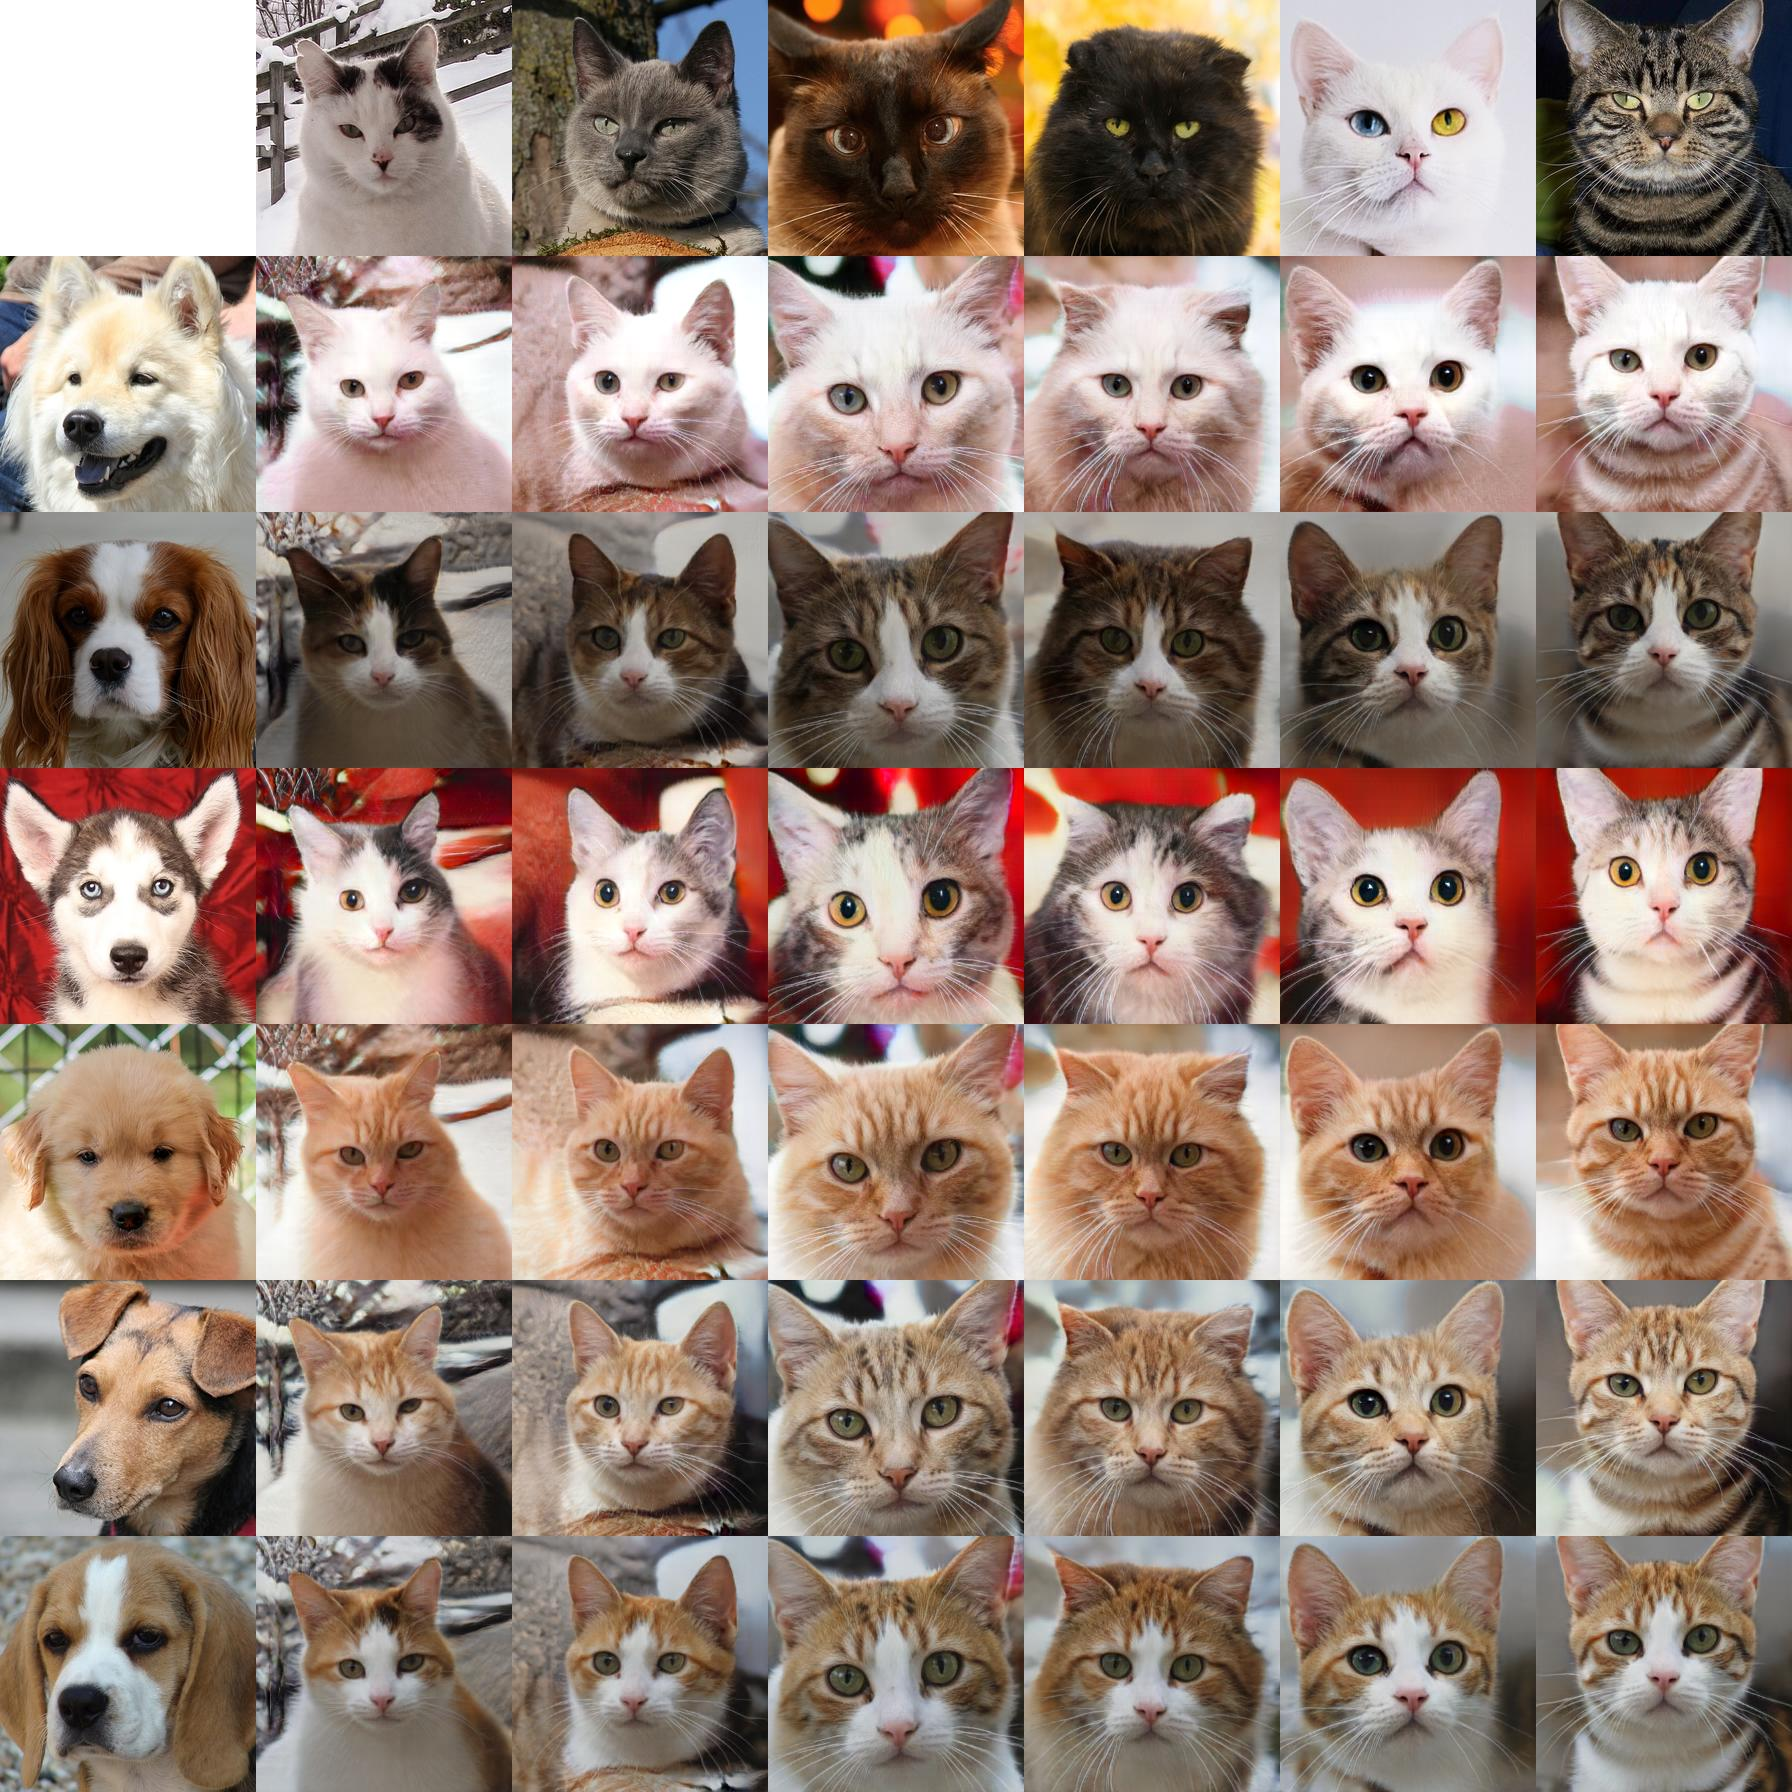

In [13]:

solver.sample(loaders)
##############################################################
# Problem 1: 결과 출력 -> 출력된 이미지를 코드로 visualize(방법은 자유) #
# 출력 결과물 이름은 reference.jpg로 되어있습니다.                    #
import matplotlib.pyplot as plt
from PIL import Image

result = Image.open(f"/content/stargan-v2/results/reference.jpg")
result
##############################################################
